In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Interpolation

Fitting

* Exact Fit
  * Interpolation
  * Extrapolation
* Approximate fit?

## Weierstrass Approximation Theorem

> Suppose that $f$ is defined and continuous on $[a, \,b]$.
> Foreach $\epsilon > 0$, there exists a polynomial $P(x)$ defined on $[a,\, b]$, with the property that
> $$|f(x)-P(x)| < \epsilon,\quad \forall x \in [a,\,b]$$

## Lagrange Interpolating Polynomial

Think about $L_i(x)$

$P_n(x) = \sum_{i=0}^{n} {L_i(x)f_i}$



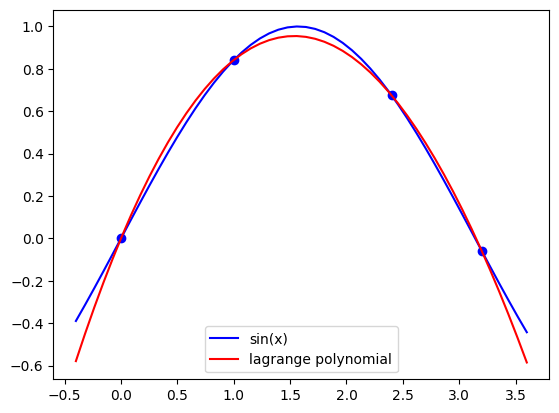

In [3]:
x = sp.Symbol("x")
f = [0, np.sin(1.0), np.sin(2.4), np.sin(3.2)]
p = [0, 1.0, 2.4, 3.2]

L0 = (x - p[1]) / (p[0] - p[1]) * (x - p[2]) / (p[0] - p[2]) * (x - p[3]) / (p[0] - p[3])
L1 = (x - p[0]) / (p[1] - p[0]) * (x - p[2]) / (p[1] - p[2]) * (x - p[3]) / (p[1] - p[3])
L2 = (x - p[0]) / (p[2] - p[0]) * (x - p[1]) / (p[2] - p[1]) * (x - p[3]) / (p[2] - p[3])
L3 = (x - p[0]) / (p[3] - p[0]) * (x - p[1]) / (p[3] - p[1]) * (x - p[2]) / (p[3] - p[2])

P = L0 * f[0] + L1 * f[1] + L2 * f[2] + L3 * f[3]

l = np.linspace(-0.4, 3.6)
plt.plot(l, np.sin(l), color='blue', label="sin(x)")
plt.scatter(p, f, color='blue')
plt.plot(l, [P.subs({x : t}) for t in l], color='red', label='lagrange polynomial')
plt.legend()
plt.show()

## Differences

### Divided Differences

## Newton's Forward Difference

## Spline Interpolation

* linear spline
* quadratic spline
* cubic spline


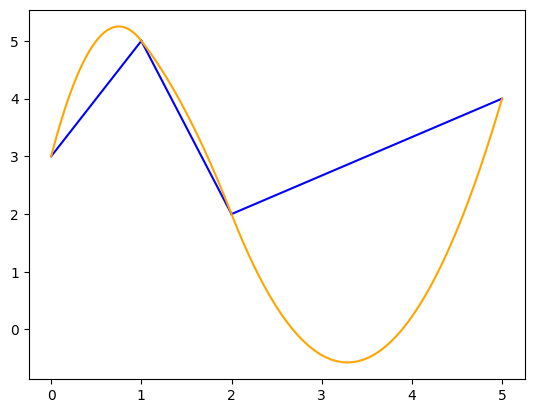

In [13]:
x = np.array([0, 1, 2, 5])
y = np.array([3, 5, 2, 4])

t = np.linspace(0, 1)

spline1 = lambda x, i, t: x[i + 1] * (t) + x[i] * (1 - t)


def get_spline2s(x, y):
    n = len(x) - 1

    A = np.zeros(n)
    B = np.zeros(n)
    C = np.zeros(n)

    dx = np.diff(x)
    dy = np.diff(y)

    z = np.zeros(n + 1)
    z[0] = 6
    for i in range(n):
        slope = dy[i] / dx[i]
        z[i + 1] = 2 * slope - z[i]

    for i in range(n):
        C[i] = y[i]
        B[i] = z[i]
        A[i] = (dy[i] - z[i] * dx[i]) / (dx[i] ** 2)

    return A, B, C

def spline2(i, t, A, B, C, x_knots):
    h_i = x_knots[i+1] - x_knots[i]
    
    x_val = x_knots[i] * (1 - t) + x_knots[i+1] * t
    
    dx_t = h_i * t
    y_val = A[i] * dx_t**2 + B[i] * dx_t + C[i]
    
    return x_val, y_val

A, B, C = get_spline2s(x, y)

for i in range(len(x) - 1):
    plt.plot(spline1(x, i, t), spline1(y, i, t), color="blue")
    plt.plot(spline2(i, t, A, B, C, x)[0], spline2(i, t, A, B, C, x)[1], color='orange')
plt.show()